# Projet CNN

In [1]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from numpy import expand_dims
from imutils import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

2023-05-05 09:22:22.198721: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 09:22:22.576343: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 09:22:22.579442: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 09:22:24.491948: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# import du dataset 

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

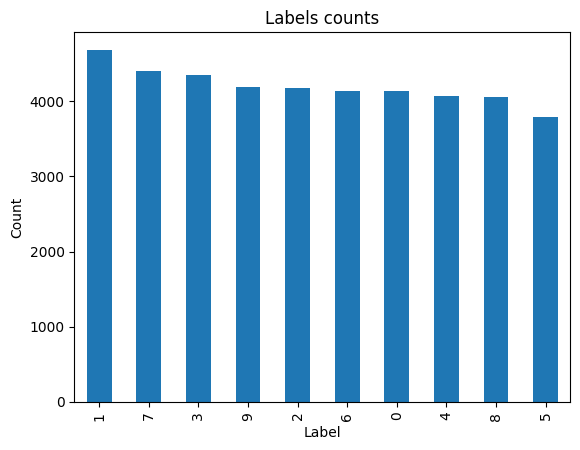

In [5]:
# verification qu'il n'y a pas une trop grande disparité entre les différentes classes
train.label.value_counts().plot(kind='bar')
plt.title('Labels counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# preparation du dataset

In [3]:
#séparation entre la targer et les features
X = np.array(train.drop(['label'],axis=1))
y = train[['label']]

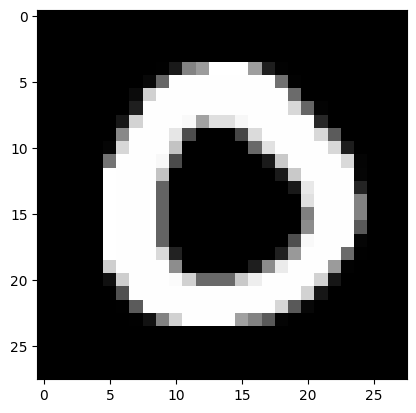

In [7]:
# observation d'une feature 
obs  = np.array(X)
img= obs[4]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.show()

In [8]:
print(X.shape)

(42000, 784)


In [4]:
# split entre training et test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# reshape et normalisation  des data
X_train = ((X_train).reshape((-1,28,28,1)))/255.0
X_test = ((X_test).reshape((-1 ,28,28,1)))/255.0


# Creation du modéle

In [5]:
model = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(8, (3, 3), activation='relu',input_shape=(28, 28, 1)), # applies kernels to our data
        tf.keras.layers.MaxPooling2D(2, 2), # reduce dimension

        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),

        tf.keras.layers.Dense(len(train.label.unique()), activation=tf.nn.softmax) # generalized logistic regression
    ])


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 288)               0

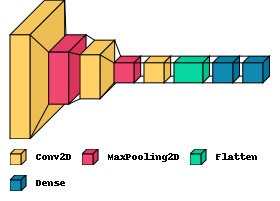

In [30]:
import visualkeras


visualkeras.layered_view(model,legend=True).show() # display using your system viewer

In [8]:

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=32, verbose=1)

2023-05-05 08:57:53.856196: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88247040 exceeds 10% of free system memory.


Epoch 1/10
880/880 [==============================] - 16s 15ms/step - loss: 0.3076 - accuracy: 0.9057 - val_loss: 0.1292 - val_accuracy: 0.9587
Epoch 2/10
880/880 [==============================] - 13s 15ms/step - loss: 0.0962 - accuracy: 0.9694 - val_loss: 0.0925 - val_accuracy: 0.9720
Epoch 3/10
880/880 [==============================] - 12s 14ms/step - loss: 0.0697 - accuracy: 0.9777 - val_loss: 0.0657 - val_accuracy: 0.9795
Epoch 4/10
880/880 [==============================] - 12s 14ms/step - loss: 0.0546 - accuracy: 0.9822 - val_loss: 0.0656 - val_accuracy: 0.9798
Epoch 5/10
880/880 [==============================] - 12s 14ms/step - loss: 0.0418 - accuracy: 0.9863 - val_loss: 0.0658 - val_accuracy: 0.9790
Epoch 6/10
880/880 [==============================] - 12s 14ms/step - loss: 0.0360 - accuracy: 0.9881 - val_loss: 0.0544 - val_accuracy: 0.9825
Epoch 7/10
880/880 [==============================] - 12s 14ms/step - loss: 0.0314 - accuracy: 0.9892 - val_loss: 0.0524 - val_accuracy:

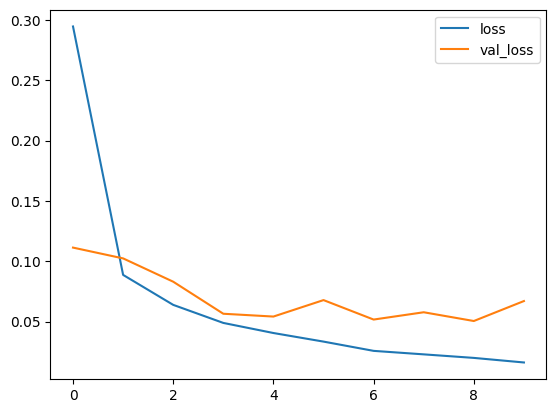

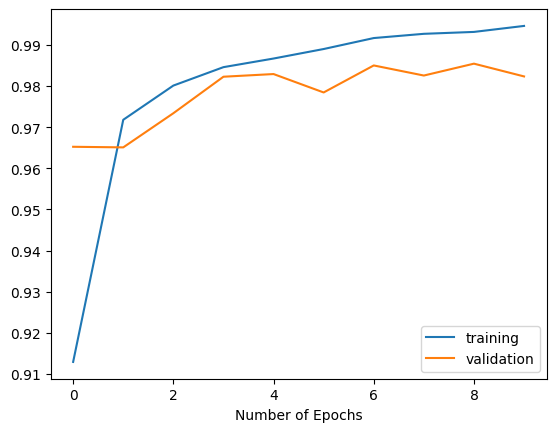

In [10]:
# Plot training vs validation accruacy
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

434/434 [==============================] - 2s 5ms/step


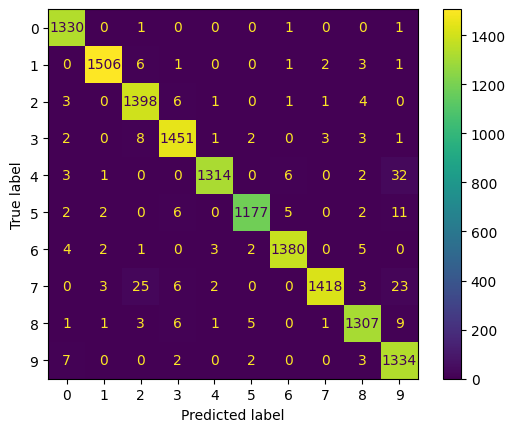

In [11]:
test_predictions = model.predict(X_test)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = y_test

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()


# Save the model: pickle ou h5

In [33]:
import pickle

with open('../model.pickle', 'wb') as f:
    pickle.dump(model, f)
    f.close()

In [38]:
model.save('my_model2.h5')

# Test du model avec le fichier test 

In [25]:
test = np.array(pd.read_csv('test.csv'))

In [18]:
test1 = ((test[150]).reshape((-1,28,28,1)))/255.0

In [19]:
test1.shape

(1, 28, 28, 1)

In [20]:
predictions = model.predict(test1)
predictions

1/1 [==============================] - 0s 38ms/step


array([[7.0996759e-12, 2.7682947e-07, 5.8935168e-10, 7.8986391e-09,
        9.9919623e-01, 6.4390903e-08, 1.1589046e-11, 5.7717270e-06,
        2.9093312e-06, 7.9484261e-04]], dtype=float32)

In [21]:
alors = np.argmax(predictions)
alors

4

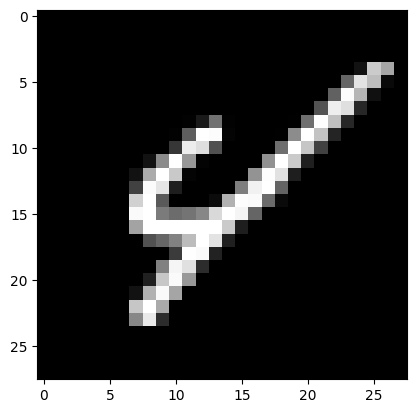

In [22]:
img_test= test[150]
img_test2 = img_test.reshape((28,28))
plt.imshow(img_test2 , cmap='gray')
plt.show()


# visualisation des couches


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 288)               0

In [13]:
for i in range(len(model.layers)):
    layer = model.layers[i]
 # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d (None, 26, 26, 8)
1 max_pooling2d (None, 13, 13, 8)
2 conv2d_1 (None, 11, 11, 16)
3 max_pooling2d_1 (None, 5, 5, 16)
4 conv2d_2 (None, 3, 3, 32)
5 flatten (None, 288)
6 dense (None, 128)
7 dense_1 (None, 10)


In [26]:
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[0:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
test = ((test[1]).reshape((-1,28,28,1)))/255.0

# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(test)

1/1 [==============================] - 0s 138ms/step


(1, 26, 26, 8)
(1, 13, 13, 8)
(1, 11, 11, 16)
(1, 5, 5, 16)
(1, 3, 3, 32)
(1, 288)
(1, 128)
(1, 10)


/tmp/ipykernel_7195/4076962578.py:15: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


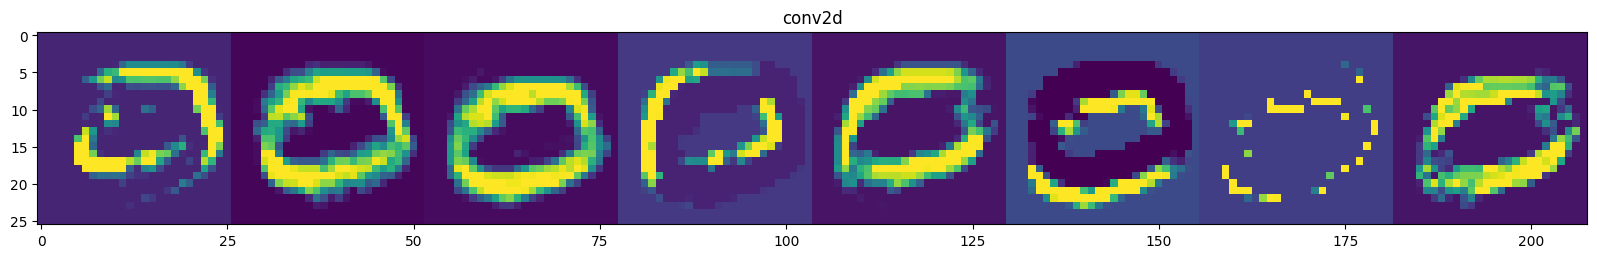

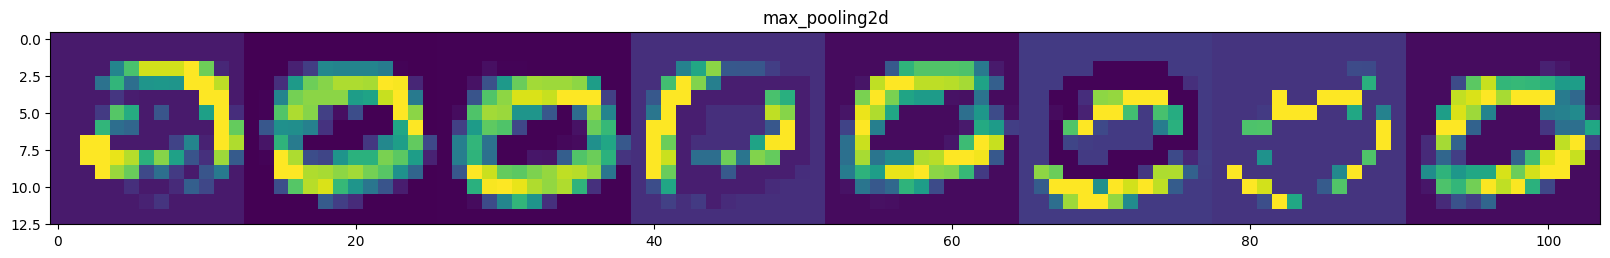

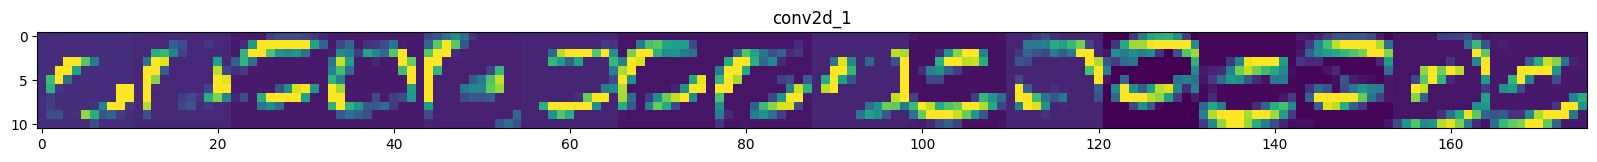

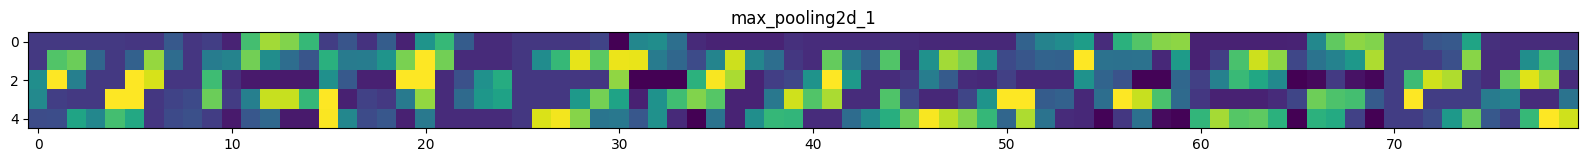

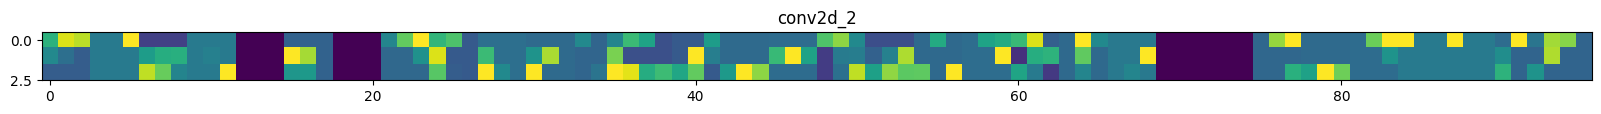

In [27]:
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
            # Postprocess the feature to be visually palatable
        for i in range(n_features):
                x = feature_map[-1, :, :, i]
                x -= x.mean()
                x /= x.std ()
                x *=  64
                x += 128
                x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
                display_grid[:, i * size : (i + 1) * size] = x
    #Display the grid
                scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )



In [ ]:
shape 

In [11]:
y_pred_train = model.predict(X_test)
bad_predictions = (y_pred_train.argmax(axis=1) != np.array(y_test))
print('Bad predictions:', len(sum(bad_predictions)))

434/434 [==============================] - 2s 5ms/step
Bad predictions: 13860


# explicabilité du model using lime

In [5]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

 lime module that we will use works only with 3-D images

In [6]:
def to_rgb(x):
    x_rgb = np.zeros((x.shape[0], 28, 28, 3))
    for i in range(3):
        x_rgb[..., i] = x[..., 0]
    return x_rgb
X_train_lime = to_rgb(X_train)
X_test_lime = to_rgb(X_test)

In [7]:
model2 = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(8, (3, 3), activation='relu',input_shape=(28, 28, 3)), # applies kernels to our data
        tf.keras.layers.MaxPooling2D(2, 2), # reduce dimension

        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),

        tf.keras.layers.Dense(len(train.label.unique()), activation=tf.nn.softmax) # generalized logistic regression
    ])


In [8]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [9]:
history2 = model2.fit(X_train_lime, y_train, epochs=10,
                    validation_data=(X_test_lime, y_test),
                    batch_size=32, verbose=1)

2023-05-05 09:24:17.184633: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264741120 exceeds 10% of free system memory.


Epoch 1/10
  7/880 [..............................] - ETA: 25s - loss: 2.2893 - accuracy: 0.1027

2023-05-05 09:24:24.852028: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23243616 exceeds 10% of free system memory.
2023-05-05 09:24:24.852228: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23243616 exceeds 10% of free system memory.
2023-05-05 09:24:24.862058: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24092640 exceeds 10% of free system memory.
2023-05-05 09:24:24.901493: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23243616 exceeds 10% of free system memory.


880/880 [==============================] - 22s 20ms/step - loss: 0.2749 - accuracy: 0.9185 - val_loss: 0.1029 - val_accuracy: 0.9672
Epoch 2/10
880/880 [==============================] - 12s 14ms/step - loss: 0.0813 - accuracy: 0.9744 - val_loss: 0.0833 - val_accuracy: 0.9746
Epoch 3/10
880/880 [==============================] - 13s 14ms/step - loss: 0.0556 - accuracy: 0.9820 - val_loss: 0.0586 - val_accuracy: 0.9818
Epoch 4/10
880/880 [==============================] - 12s 14ms/step - loss: 0.0442 - accuracy: 0.9856 - val_loss: 0.0521 - val_accuracy: 0.9841
Epoch 5/10
880/880 [==============================] - 12s 14ms/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.0548 - val_accuracy: 0.9820
Epoch 6/10
880/880 [==============================] - 12s 14ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0559 - val_accuracy: 0.9828
Epoch 7/10
880/880 [==============================] - 12s 14ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.0534 - val_accuracy: 0.9846
Epo

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


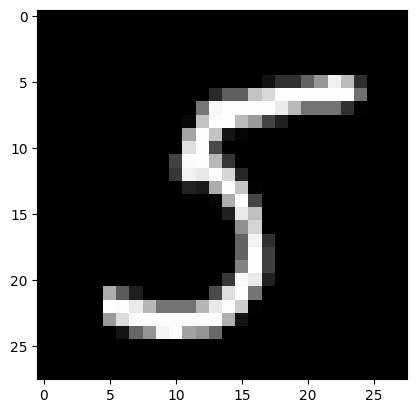

In [48]:
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         X_test_lime[300], model2.predict)
plt.imshow(X_test_lime[300])

1/1 [==============================] - 0s 38ms/step


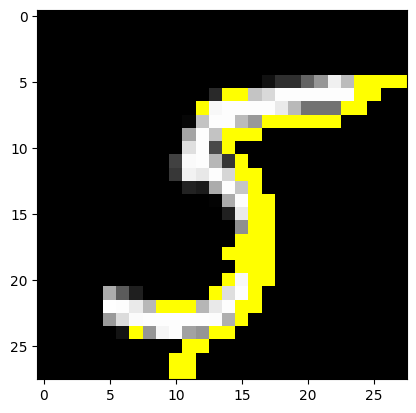

In [49]:
image, mask = explanation.get_image_and_mask(
         model2.predict(X_test_lime[300].reshape(-1,28,28,3)).argmax(axis=1)[0],positive_only=True, hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

The returned image with the corresponding mask represents the features in the image responsible for the prediction.

# data augmentation

In [13]:
datagen = ImageDataGenerator(rotation_range=30,
                             fill_mode='nearest')

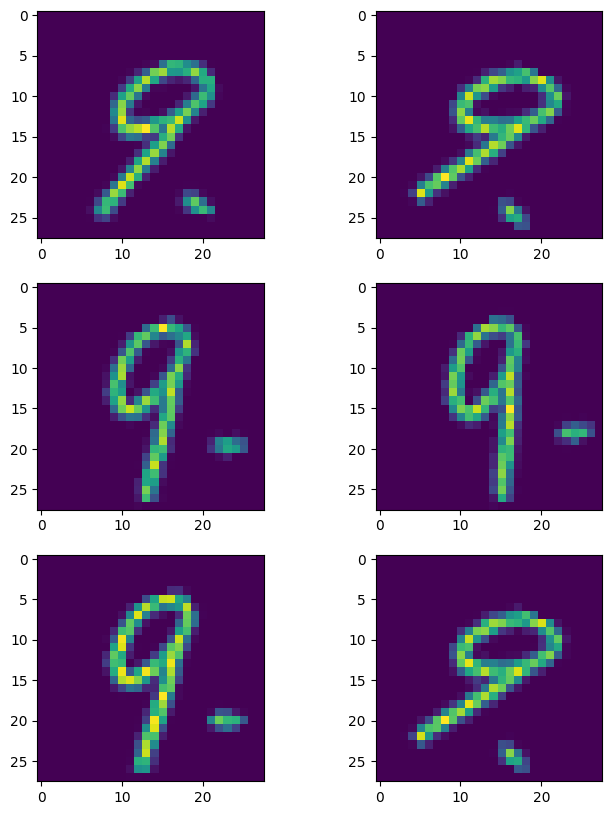

In [13]:

plt.figure(figsize=(8,10))


datagen = ImageDataGenerator(rotation_range=30,
                             fill_mode='nearest')
okok = (test[2]).reshape((-1,28,28,1))
# prepare iterator
iterator = datagen.flow(okok, batch_size=1,seed=42)


for i in range(6):
    plt.subplot(3,2,i+1)
    # generate batch of images
    batch = iterator.next()

    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    plt.imshow(image)

In [14]:
#boucle pour realisé une rotation sur tout le dataset
non = []
for img in range(42000):
    # prepare iterator
    okok = (X[img]).reshape((-1,28,28,1))
    iterator = datagen.flow(okok, batch_size=1,seed=42)
    for i in range(2):
        # generate batch of images
        batch = iterator.next()
        non.append(batch)

In [15]:
len(non)

84000

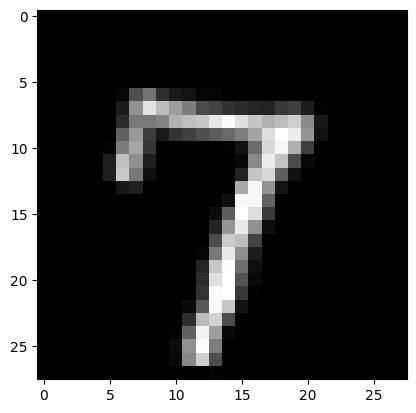

In [22]:
img_test_1= non[12].reshape((28,28))
plt.imshow(img_test_1, cmap='gray')
plt.show()

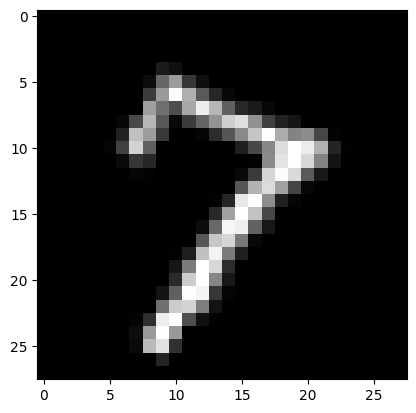

In [23]:
img_test_2= non[13].reshape((28,28))
plt.imshow(img_test_2, cmap='gray')
plt.show()

In [24]:
non = np.array(non)

In [25]:
non.shape

(84000, 1, 28, 28, 1)

In [28]:
#  permet de dupliqué des lignes pour que le labels corresponde
df_new = pd.DataFrame(np.repeat(y.values, 2, axis=0))
df_new.columns = y_train.columns


In [29]:
df_new

,label
0,1
1,1
2,0
3,0
4,1
...,...
83995,7
83996,6
83997,6
83998,9


In [30]:
# split entre training et test
X_train2, X_test2, y_train2, y_test2 = train_test_split(non, df_new,test_size=0.33,random_state=42)

# reshape et normalisation  des data
X_train2 = ((X_train2).reshape((-1,28,28,1)))/255.0
X_test2 = ((X_test2).reshape((-1 ,28,28,1)))/255.0

In [31]:
history2 = model.fit(X_train2, y_train2, epochs=10,
                    validation_data=(X_test2, y_test2),
                    batch_size=32, verbose=1)

2023-05-04 14:08:09.362300: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 176494080 exceeds 10% of free system memory.


Epoch 1/10
1758/1759 [============================>.] - ETA: 0s - loss: 0.0573 - accuracy: 0.9821

2023-05-04 14:08:31.575541: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 86929920 exceeds 10% of free system memory.


1759/1759 [==============================] - 26s 15ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0456 - val_accuracy: 0.9855
Epoch 2/10
1759/1759 [==============================] - 25s 14ms/step - loss: 0.0366 - accuracy: 0.9879 - val_loss: 0.0463 - val_accuracy: 0.9847
Epoch 3/10
1759/1759 [==============================] - 25s 14ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0349 - val_accuracy: 0.9890
Epoch 4/10
1759/1759 [==============================] - 25s 14ms/step - loss: 0.0233 - accuracy: 0.9920 - val_loss: 0.0416 - val_accuracy: 0.9875
Epoch 5/10
1759/1759 [==============================] - 25s 14ms/step - loss: 0.0201 - accuracy: 0.9931 - val_loss: 0.0379 - val_accuracy: 0.9887
Epoch 6/10
1759/1759 [==============================] - 26s 15ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0337 - val_accuracy: 0.9904
Epoch 7/10
1759/1759 [==============================] - 27s 15ms/step - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.0368 - val_accura

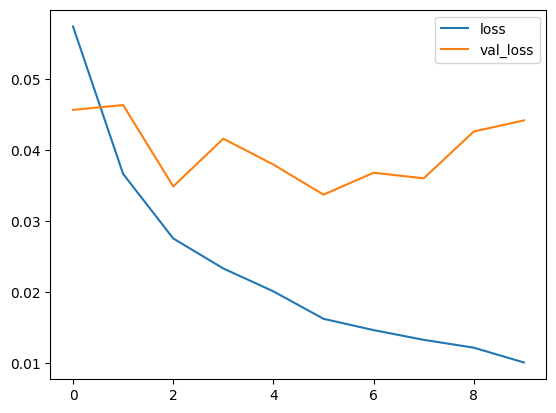

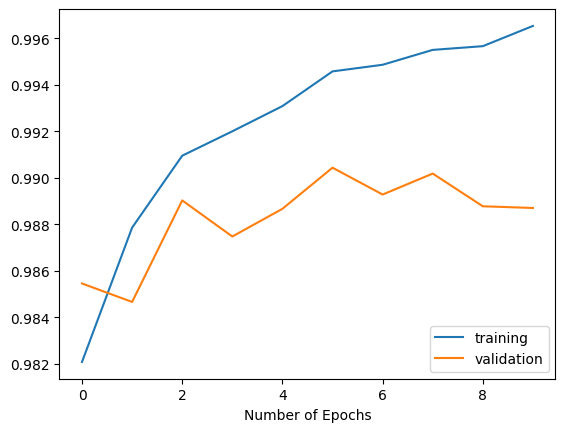

In [32]:
# Plot training vs validation accruacy
history_frame2 = pd.DataFrame(history2.history)
history_frame2.loc[:, ['loss', 'val_loss']].plot()
history_frame2.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

 11/867 [..............................] - ETA: 4s 

2023-05-04 14:13:24.931125: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 86929920 exceeds 10% of free system memory.


867/867 [==============================] - 5s 5ms/step


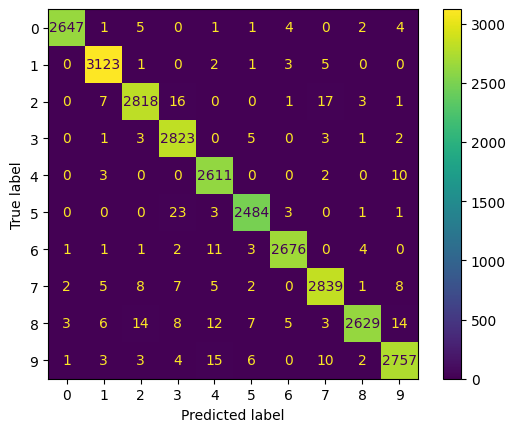

In [34]:
test_predictions = model.predict(X_test2)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = y_test2

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [35]:
model.save('my_model_newdata.h5')